In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# for PCA transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Remove nrows when ready for full dataset

# Remove 2K from name in last block for complete file

In [4]:
# WARNING, FILE "mergefiles.csv" IS 1.37 GB

delay_data = pd.read_csv("./Resources/mergefiles.csv", encoding = 'utf-8', nrows = 200000)
delay = pd.DataFrame(delay_data)

# 1. Data Exploration

In [5]:
# Data type
delay.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [6]:
delay.drop_duplicates()
delay.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [7]:
# Missing data
delay.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [8]:
# Number of unique values, and range
for col in delay.columns:
    print(f'"{col}" has {delay[col].nunique()} unique values, from {delay[col].min()} to {delay[col].max()}')

"MONTH" has 1 unique values, from 1 to 1
"DAY_OF_WEEK" has 7 unique values, from 1 to 7
"DEP_DEL15" has 2 unique values, from 0 to 1
"DEP_TIME_BLK" has 19 unique values, from 0001-0559 to 2300-2359
"DISTANCE_GROUP" has 11 unique values, from 1 to 11
"SEGMENT_NUMBER" has 14 unique values, from 1 to 14
"CONCURRENT_FLIGHTS" has 92 unique values, from 1 to 93
"NUMBER_OF_SEATS" has 78 unique values, from 44 to 337
"CARRIER_NAME" has 17 unique values, from Alaska Airlines Inc. to United Air Lines Inc.
"AIRPORT_FLIGHTS_MONTH" has 80 unique values, from 1134 to 30842
"AIRLINE_FLIGHTS_MONTH" has 17 unique values, from 6713 to 107363
"AIRLINE_AIRPORT_FLIGHTS_MONTH" has 512 unique values, from 1 to 18809
"AVG_MONTHLY_PASS_AIRPORT" has 80 unique values, from 89733 to 4365661
"AVG_MONTHLY_PASS_AIRLINE" has 17 unique values, from 473794 to 13382999
"FLT_ATTENDANTS_PER_PASS" has 14 unique values, from 0.0 to 0.000348407665605
"GROUND_SERV_PER_PASS" has 17 unique values, from 7.134694872433899e-06 to 

In [9]:
# Number of flights not delayed (0), and delayed (1)
delay['DEP_DEL15'].value_counts()

0    164920
1     35080
Name: DEP_DEL15, dtype: int64

In [10]:
# Number of airports
delay['DEPARTING_AIRPORT'].nunique()

80

In [11]:
# Number of flights per airport
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count()

DEPARTING_AIRPORT
Albuquerque International Sunport      429
Anchorage International                159
Atlanta Municipal                    10282
Austin - Bergstrom International      1721
Birmingham Airport                     905
                                     ...  
Tucson International                   742
Tulsa International                    231
Washington Dulles International       1260
Will Rogers World                      545
William P Hobby                        168
Name: DEP_DEL15, Length: 80, dtype: int64

In [12]:
# Replace " " with "_"
#delay = delay.replace(" ", "_", regex = True)
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace(" ", "_")
delay['PREVIOUS_AIRPORT'] = delay['PREVIOUS_AIRPORT'].str.replace("/", "_")
delay['DEP_TIME_BLK'] = delay['DEP_TIME_BLK'].str.replace("-", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(" ", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("/", "_")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace(".", "")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("'Hare", "Hare")
delay['DEPARTING_AIRPORT'] = delay['DEPARTING_AIRPORT'].str.replace("-", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(" ", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace("/", "_")
delay['CARRIER_NAME'] = delay['CARRIER_NAME'].str.replace(".", "")
delay.head(5)

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800_0859,2,1,25,143,Southwest_Airlines_Co,13056,...,8,McCarran_International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700_0759,7,1,29,191,Delta_Air_Lines_Inc,13056,...,3,McCarran_International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600_0659,7,1,27,199,Delta_Air_Lines_Inc,13056,...,18,McCarran_International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600_0659,9,1,27,180,Delta_Air_Lines_Inc,13056,...,2,McCarran_International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001_0559,7,1,10,182,Spirit_Air_Lines,13056,...,1,McCarran_International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [13]:
# Airport with least number of flights
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().min()

41

In [14]:
# Grouped by airport: count of delay/on-time
print(delay.groupby(['DEPARTING_AIRPORT','DEP_DEL15'])['MONTH'].agg('count'))

DEPARTING_AIRPORT                  DEP_DEL15
Albuquerque_International_Sunport  0             390
                                   1              39
Anchorage_International            0             144
                                   1              15
Atlanta_Municipal                  0            8728
                                                ... 
Washington_Dulles_International    1             179
Will_Rogers_World                  0             469
                                   1              76
William_P_Hobby                    0             141
                                   1              27
Name: MONTH, Length: 160, dtype: int64


### Distance group
1 to 11
Distance group to be flown by departing aircraft.

<AxesSubplot:>

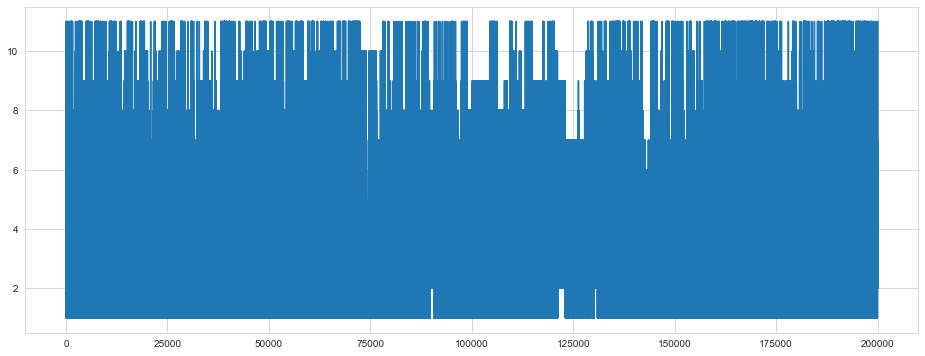

In [15]:
sns.set_style('whitegrid')
delay["DISTANCE_GROUP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

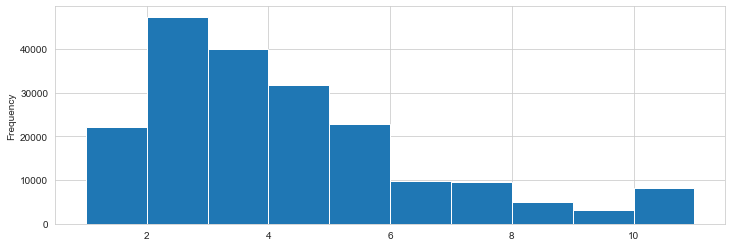

In [16]:
delay['DISTANCE_GROUP'].plot(kind='hist', figsize = (12, 4))

### Segment number
1 to 15
The segment that this tail number is on for the day.

<AxesSubplot:>

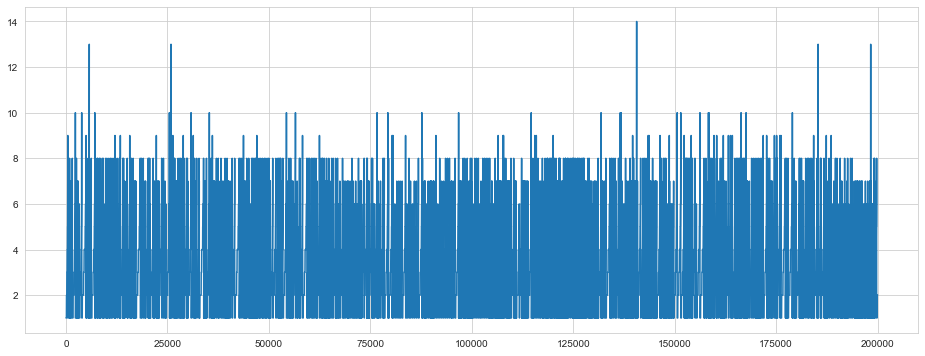

In [17]:
delay["SEGMENT_NUMBER"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

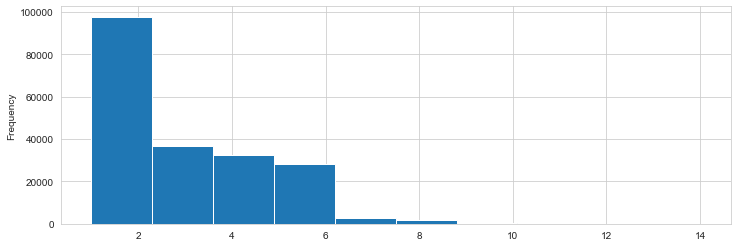

In [18]:
delay['SEGMENT_NUMBER'].plot(kind = 'hist', figsize = (12, 4))

### Concurrent flights

<AxesSubplot:>

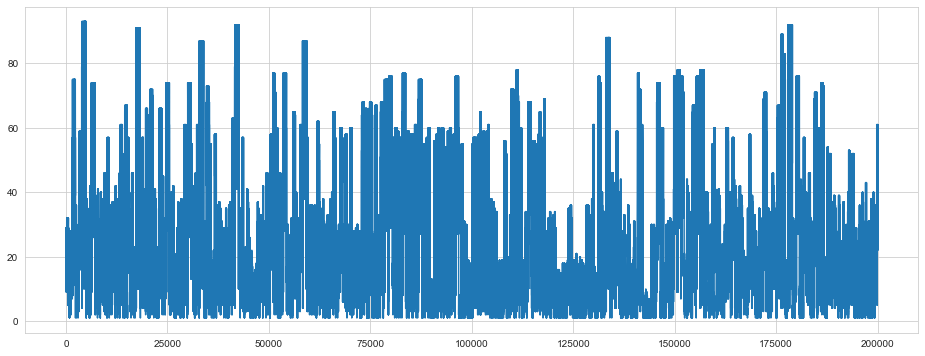

In [19]:
delay["CONCURRENT_FLIGHTS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

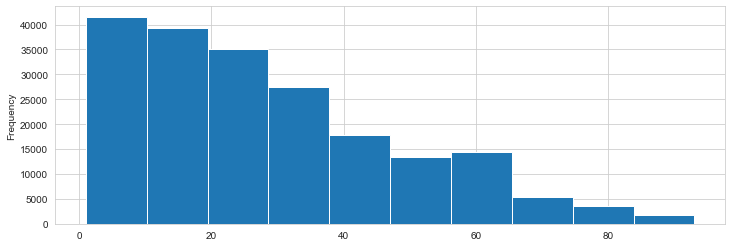

In [20]:
delay['CONCURRENT_FLIGHTS'].plot(kind = 'hist', figsize = (12, 4))

### Number of seats

<AxesSubplot:>

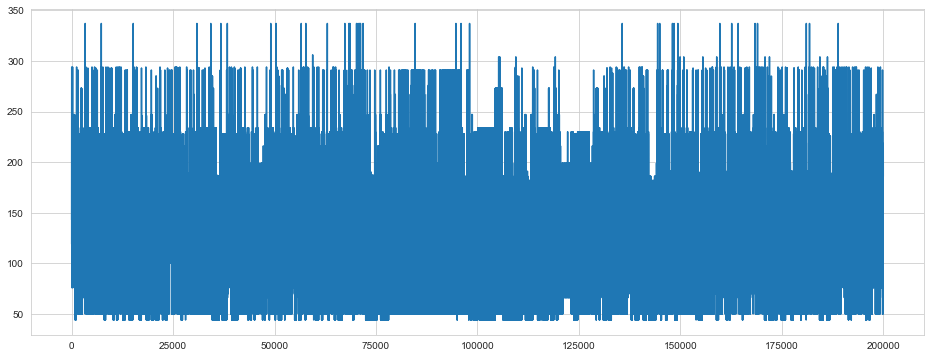

In [21]:
delay["NUMBER_OF_SEATS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

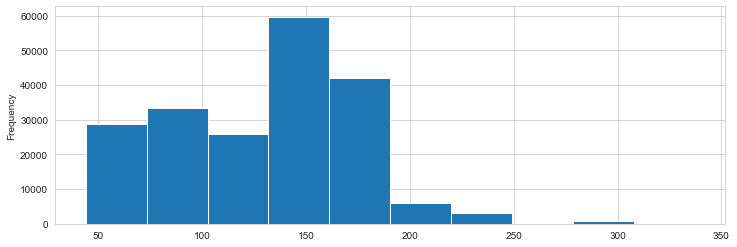

In [22]:
delay['NUMBER_OF_SEATS'].plot(kind = 'hist', figsize = (12, 4))

### Airport flights per month

<AxesSubplot:>

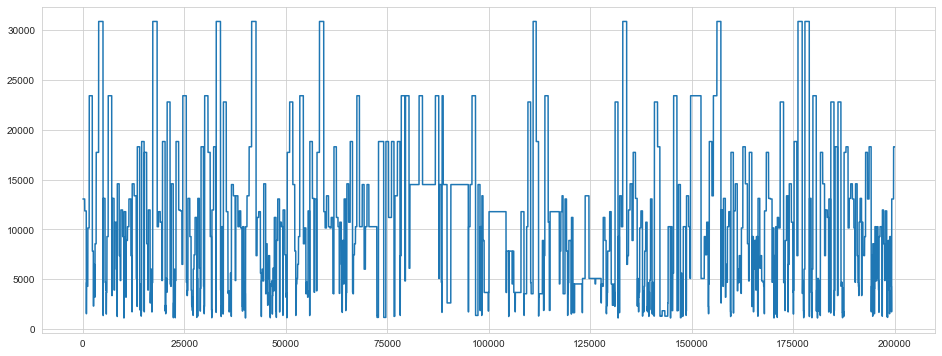

In [23]:
delay["AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

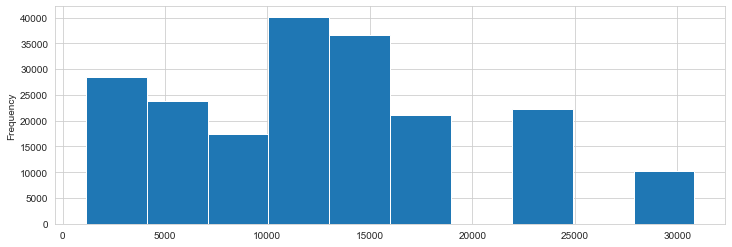

In [24]:
delay['AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### Airline flights per month

<AxesSubplot:>

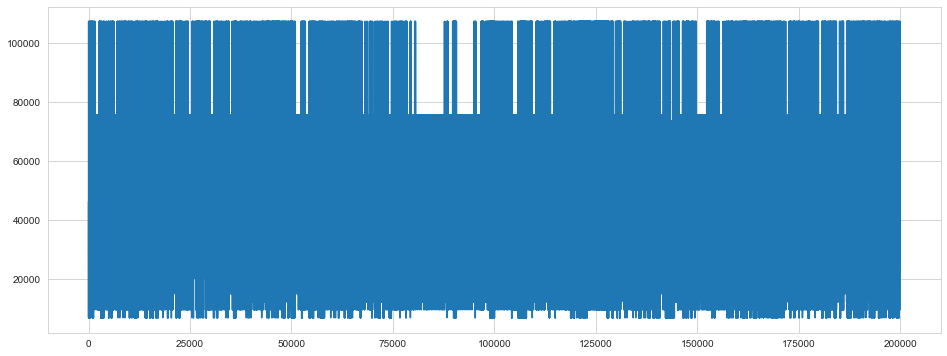

In [25]:
delay["AIRLINE_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

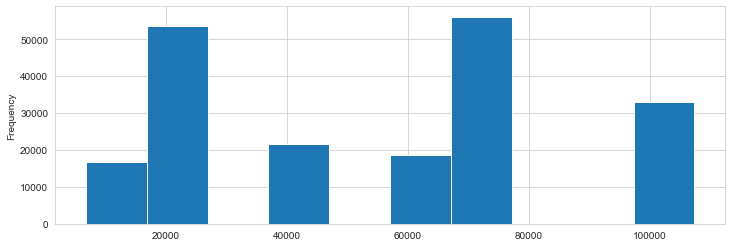

In [26]:
delay['AIRLINE_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:>

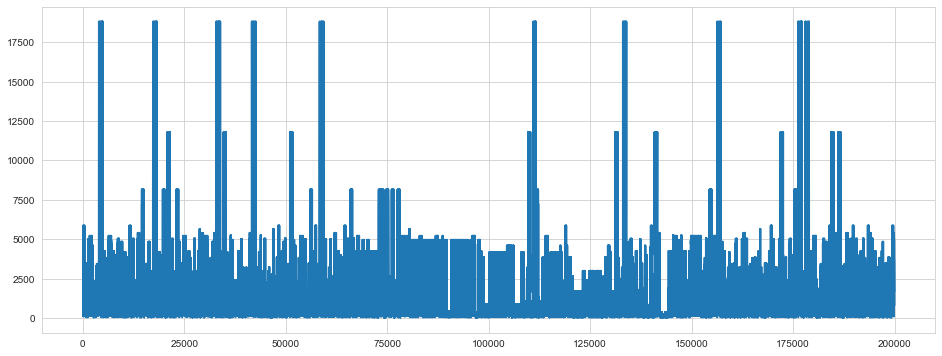

In [27]:
delay["AIRLINE_AIRPORT_FLIGHTS_MONTH"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

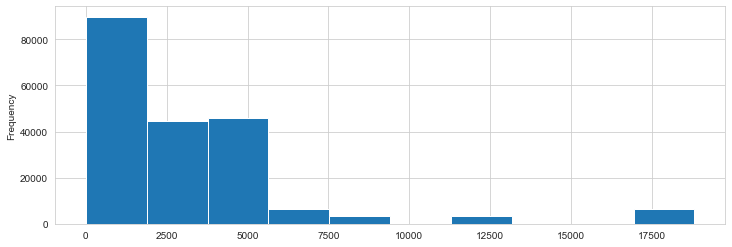

In [28]:
delay['AIRLINE_AIRPORT_FLIGHTS_MONTH'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:>

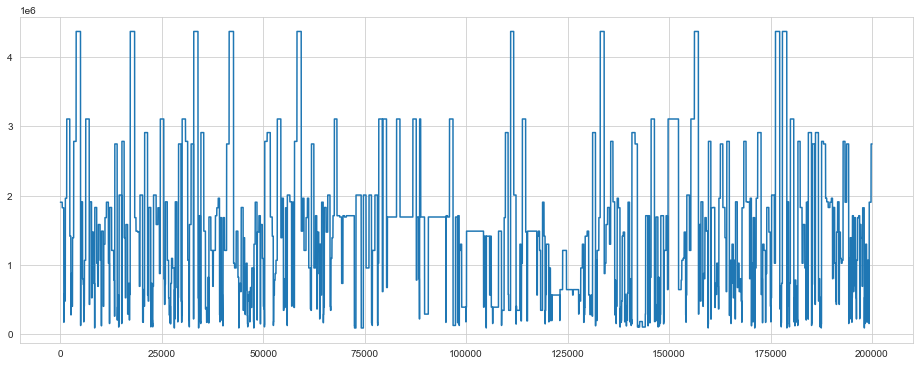

In [29]:
delay["AVG_MONTHLY_PASS_AIRPORT"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

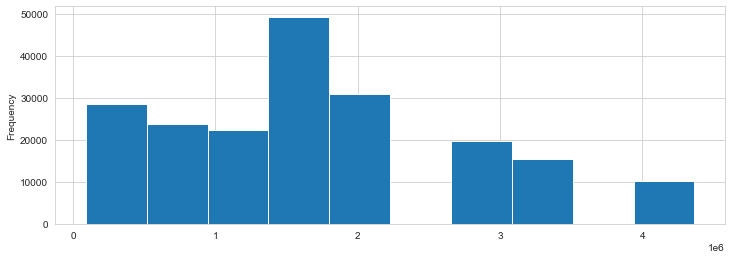

In [30]:
delay['AVG_MONTHLY_PASS_AIRPORT'].plot(kind = 'hist', figsize = (12, 4))

### AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:>

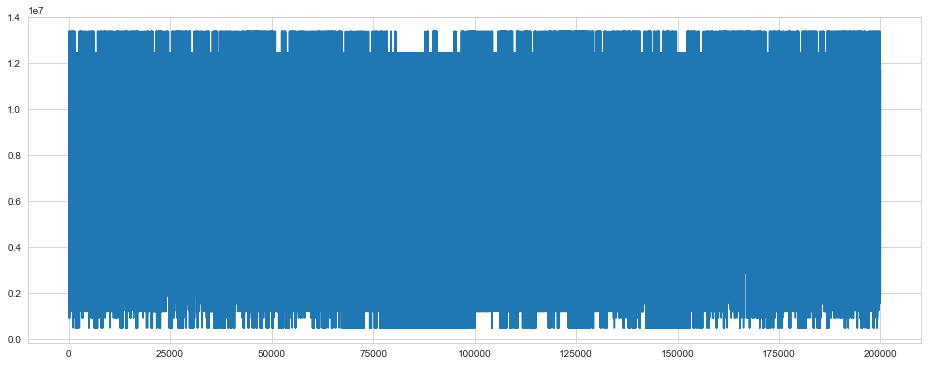

In [31]:
delay["AVG_MONTHLY_PASS_AIRLINE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

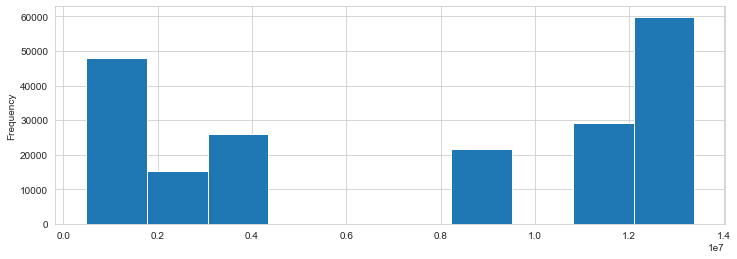

In [32]:
delay['AVG_MONTHLY_PASS_AIRLINE'].plot(kind = 'hist', figsize = (12, 4))

### FLT_ATTENDANTS_PER_PASS

<AxesSubplot:>

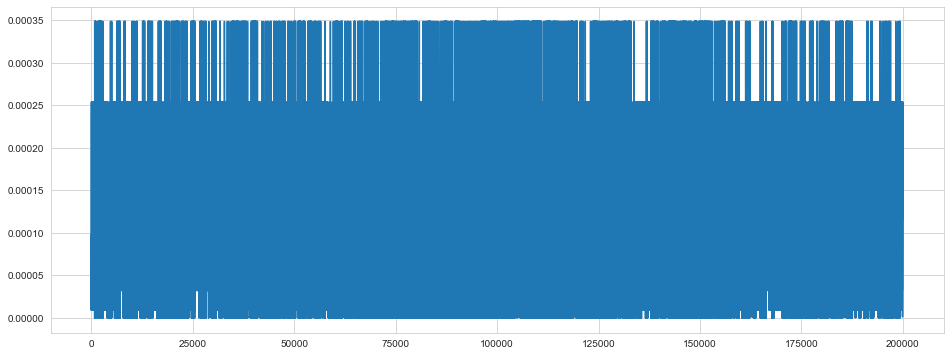

In [33]:
delay["FLT_ATTENDANTS_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

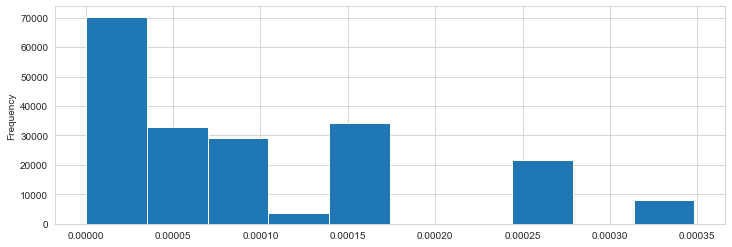

In [34]:
delay['FLT_ATTENDANTS_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### GROUND_SERV_PER_PASS

<AxesSubplot:>

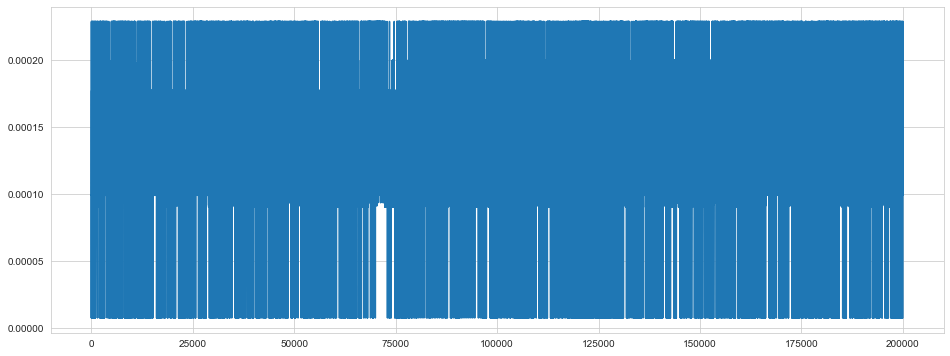

In [35]:
delay["GROUND_SERV_PER_PASS"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

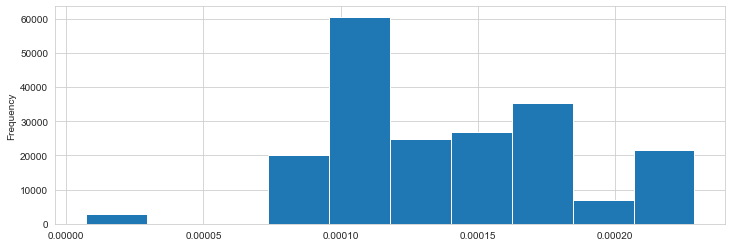

In [36]:
delay['GROUND_SERV_PER_PASS'].plot(kind = 'hist', figsize = (12, 4))

### Plane age

<AxesSubplot:>

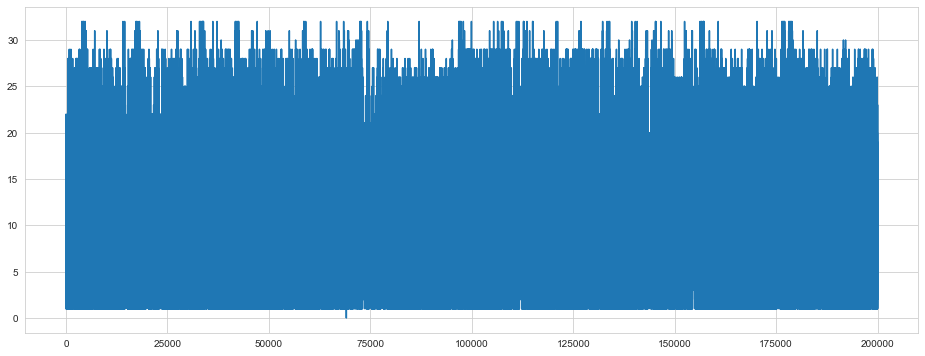

In [37]:
delay["PLANE_AGE"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

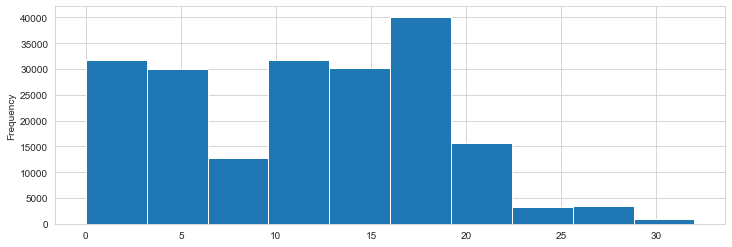

In [38]:
delay['PLANE_AGE'].plot(kind = 'hist', figsize = (12, 4))

### Departing airport

<AxesSubplot:xlabel='DEPARTING_AIRPORT'>

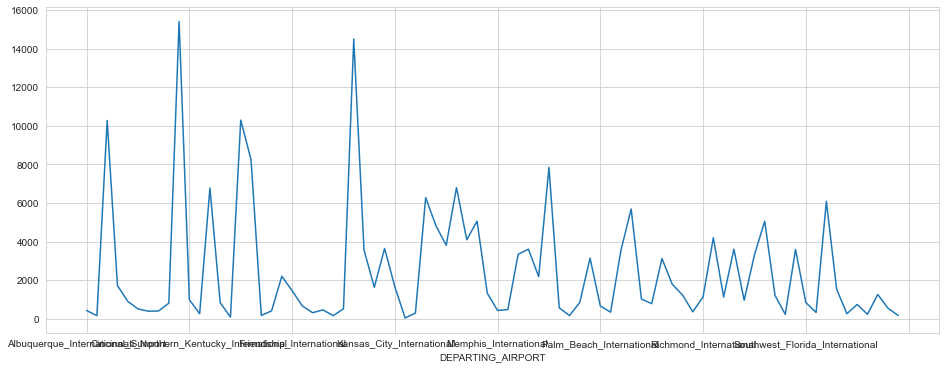

In [39]:
delay.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Previous airport

<AxesSubplot:xlabel='PREVIOUS_AIRPORT'>

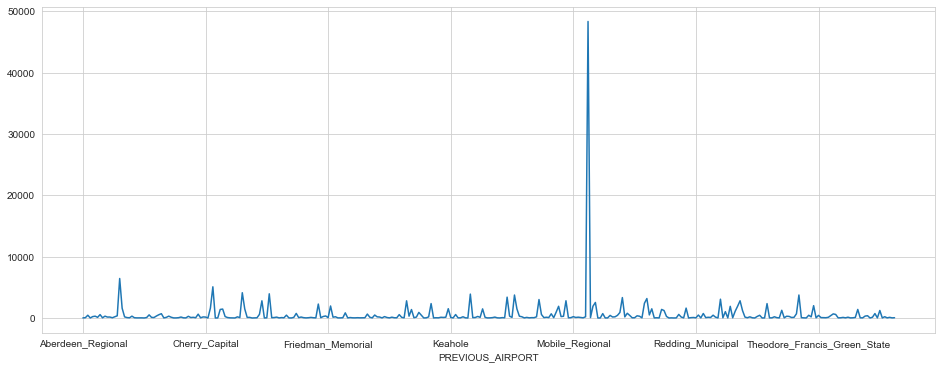

In [40]:
delay.groupby('PREVIOUS_AIRPORT')['DEP_DEL15'].count().plot(figsize = (16, 6))

### Precipitation

<AxesSubplot:>

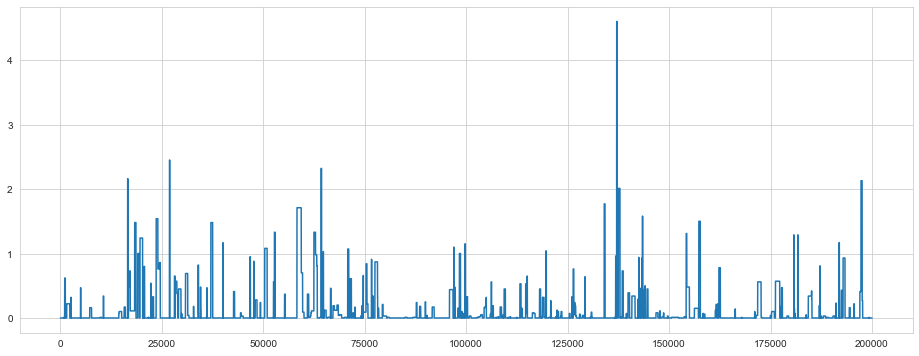

In [41]:
delay["PRCP"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

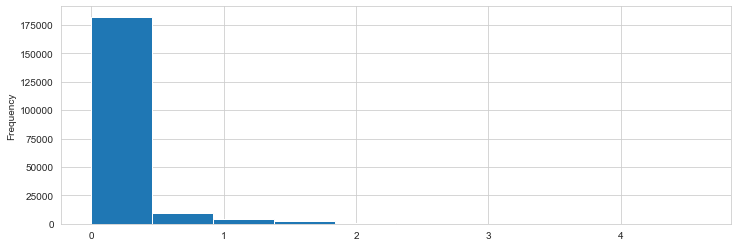

In [42]:
delay['PRCP'].plot(kind = 'hist', figsize = (12, 4))

### Snow (SNOW)
0 to 17.2
Inches of snowfall for day.

<AxesSubplot:>

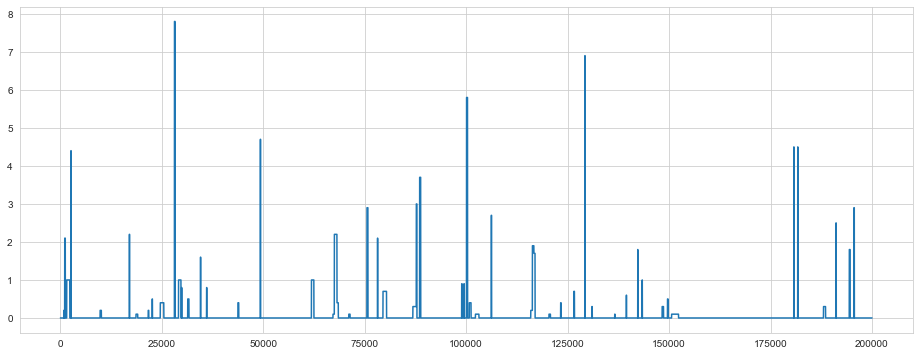

In [43]:
delay["SNOW"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

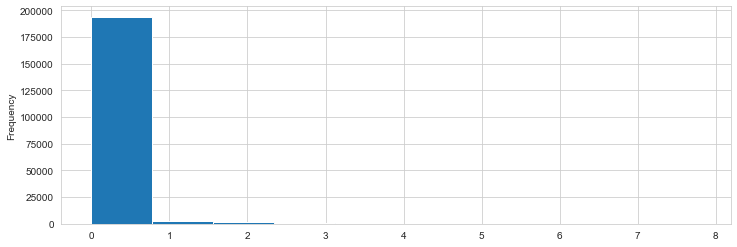

In [44]:
delay['SNOW'].plot(kind = 'hist', figsize = (12, 4))

### SNOWD
0 to 25.2
Inches of snow on ground for day.

<AxesSubplot:>

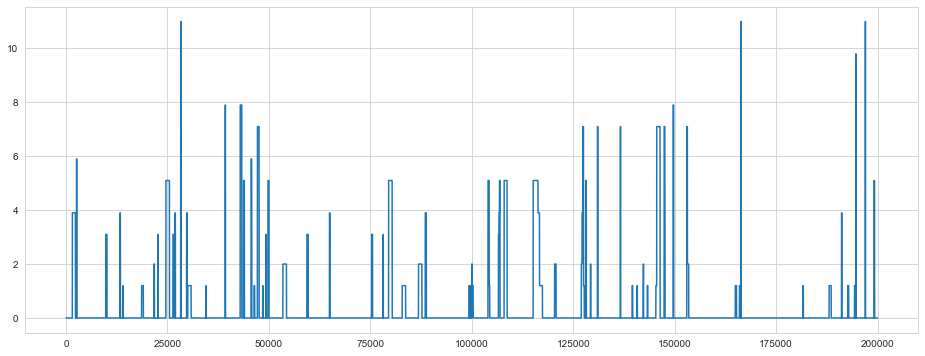

In [45]:
delay["SNWD"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

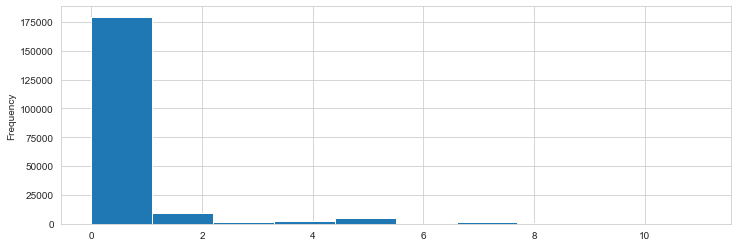

In [46]:
delay['SNWD'].plot(kind='hist', figsize = (12, 4))

### Temperature

<AxesSubplot:>

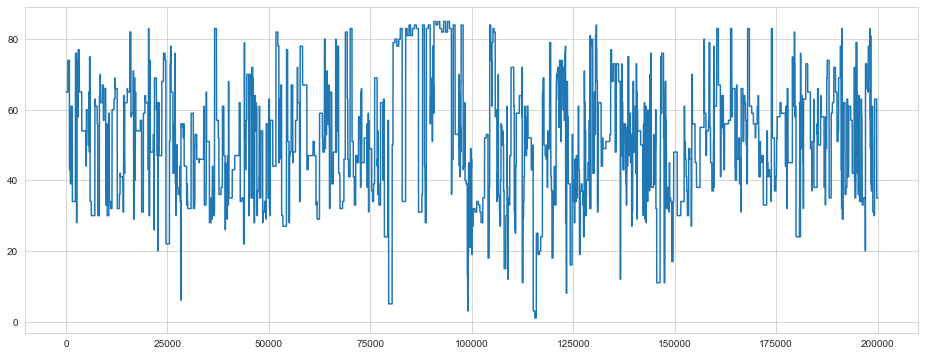

In [47]:
delay["TMAX"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

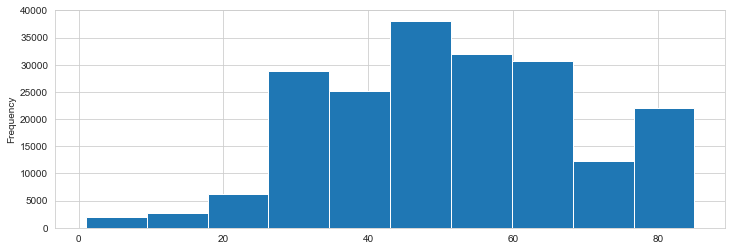

In [48]:
delay['TMAX'].plot(kind = 'hist', figsize = (12, 4))

### Air wind speed (AWND)
0 to 33.78
Max wind speed for day.

<AxesSubplot:>

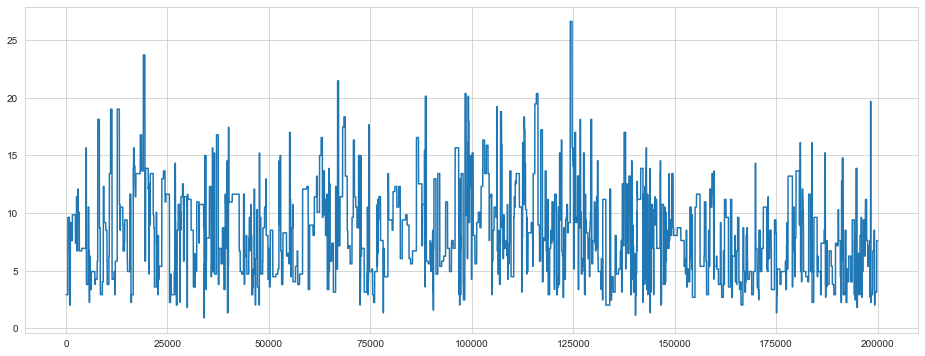

In [49]:
delay["AWND"].plot(figsize = (16, 6))

<AxesSubplot:ylabel='Frequency'>

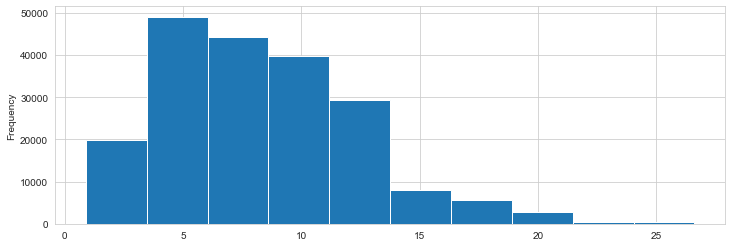

In [50]:
delay['AWND'].plot(kind = 'hist', figsize = (12, 4))

# 2. Data Cleanup

### DEP_TIME_BLK categorical variable

In [51]:
# Visualize the value counts
DEP_TIME_BLK_counts = delay.DEP_TIME_BLK.value_counts()
DEP_TIME_BLK_counts

0800_0859    14251
0700_0759    13483
1800_1859    12895
1200_1259    12830
1000_1059    12702
1100_1159    12444
0900_0959    12353
1600_1659    12319
1500_1559    12221
1400_1459    12194
1700_1759    11907
0600_0659    11855
1900_1959    11325
1300_1359    10393
2000_2059    10267
2100_2159     6508
2200_2259     4775
0001_0559     4205
2300_2359     1073
Name: DEP_TIME_BLK, dtype: int64

<AxesSubplot:ylabel='Density'>

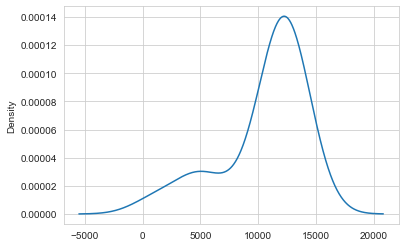

In [52]:
DEP_TIME_BLK_counts.plot.density()

In [53]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [54]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(delay.DEP_TIME_BLK.values.reshape(-1,1)))

In [55]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEP_TIME_BLK'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEP_TIME_BLK_0001_0559,DEP_TIME_BLK_0600_0659,DEP_TIME_BLK_0700_0759,DEP_TIME_BLK_0800_0859,DEP_TIME_BLK_0900_0959,DEP_TIME_BLK_1000_1059,DEP_TIME_BLK_1100_1159,DEP_TIME_BLK_1200_1259,DEP_TIME_BLK_1300_1359,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Merge the two DataFrames together and drop the encoded column
delay_block = delay.merge(encode_df,left_index = True, right_index = True).drop(["DEP_TIME_BLK"], axis = 1)

In [57]:
delay_block.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,DEP_TIME_BLK_1400_1459,DEP_TIME_BLK_1500_1559,DEP_TIME_BLK_1600_1659,DEP_TIME_BLK_1700_1759,DEP_TIME_BLK_1800_1859,DEP_TIME_BLK_1900_1959,DEP_TIME_BLK_2000_2059,DEP_TIME_BLK_2100_2159,DEP_TIME_BLK_2200_2259,DEP_TIME_BLK_2300_2359
43590,1,1,0,2,4,43,76,Endeavor_Air_Inc,11784,19857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50790,1,1,0,8,4,16,160,American_Airlines_Inc,17725,75506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190863,1,6,0,3,2,14,70,SkyWest_Airlines_Inc,7380,62105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63870,1,4,0,2,1,2,154,United_Air_Lines_Inc,1694,46218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75653,1,6,0,4,2,27,128,American_Airlines_Inc,11206,75506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Fit the encoder and produce encoded DataFrame (CARRIER_NAME)
encode_df = pd.DataFrame(enc.fit_transform(delay_block.CARRIER_NAME.values.reshape(-1,1)))

In [59]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CARRIER_NAME'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CARRIER_NAME_Alaska_Airlines_Inc,CARRIER_NAME_Allegiant_Air,CARRIER_NAME_American_Airlines_Inc,CARRIER_NAME_American_Eagle_Airlines_Inc,CARRIER_NAME_Atlantic_Southeast_Airlines,CARRIER_NAME_Comair_Inc,CARRIER_NAME_Delta_Air_Lines_Inc,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_Hawaiian_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# Merge the two DataFrames together and drop the encoded column
delay_carrier = delay_block.merge(encode_df,left_index = True, right_index = True).drop(["CARRIER_NAME"], axis = 1)

In [61]:
delay_carrier.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,CARRIER_NAME_Endeavor_Air_Inc,CARRIER_NAME_Frontier_Airlines_Inc,CARRIER_NAME_Hawaiian_Airlines_Inc,CARRIER_NAME_JetBlue_Airways,CARRIER_NAME_Mesa_Airlines_Inc,"CARRIER_NAME_Midwest_Airline,_Inc",CARRIER_NAME_SkyWest_Airlines_Inc,CARRIER_NAME_Southwest_Airlines_Co,CARRIER_NAME_Spirit_Air_Lines,CARRIER_NAME_United_Air_Lines_Inc
158980,1,4,0,7,2,25,160,10278,73508,2527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165904,1,4,0,2,5,9,186,3932,9496,17,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47999,1,1,0,7,1,15,180,13056,9496,581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79806,1,5,1,7,2,70,145,23400,15023,701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
163442,1,4,0,7,2,36,175,14576,107363,5046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# Convert DEPARTING_AIRPORT categorical variable
encode_df = pd.DataFrame(enc.fit_transform(delay_carrier.DEPARTING_AIRPORT.values.reshape(-1,1)))

In [63]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['DEPARTING_AIRPORT'])
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,DEPARTING_AIRPORT_Albuquerque_International_Sunport,DEPARTING_AIRPORT_Anchorage_International,DEPARTING_AIRPORT_Atlanta_Municipal,DEPARTING_AIRPORT_Austin___Bergstrom_International,DEPARTING_AIRPORT_Birmingham_Airport,DEPARTING_AIRPORT_Boise_Air_Terminal,DEPARTING_AIRPORT_Bradley_International,DEPARTING_AIRPORT_Charleston_International,DEPARTING_AIRPORT_Chicago_Midway_International,DEPARTING_AIRPORT_Chicago_OHare_International,...,DEPARTING_AIRPORT_Southwest_Florida_International,DEPARTING_AIRPORT_Standiford_Field,DEPARTING_AIRPORT_Stapleton_International,DEPARTING_AIRPORT_Tampa_International,DEPARTING_AIRPORT_Theodore_Francis_Green_State,DEPARTING_AIRPORT_Tucson_International,DEPARTING_AIRPORT_Tulsa_International,DEPARTING_AIRPORT_Washington_Dulles_International,DEPARTING_AIRPORT_Will_Rogers_World,DEPARTING_AIRPORT_William_P_Hobby
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Merge the two DataFrames together and drop the encoded column
delay_departing = delay_carrier.merge(encode_df,left_index = True, right_index = True).drop(["DEPARTING_AIRPORT"], axis = 1)

In [65]:
delay_departing.sample(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT_Southwest_Florida_International,DEPARTING_AIRPORT_Standiford_Field,DEPARTING_AIRPORT_Stapleton_International,DEPARTING_AIRPORT_Tampa_International,DEPARTING_AIRPORT_Theodore_Francis_Green_State,DEPARTING_AIRPORT_Tucson_International,DEPARTING_AIRPORT_Tulsa_International,DEPARTING_AIRPORT_Washington_Dulles_International,DEPARTING_AIRPORT_Will_Rogers_World,DEPARTING_AIRPORT_William_P_Hobby
154638,1,4,0,3,3,57,187,18811,75506,8156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50654,1,1,0,8,3,34,129,17725,73508,2896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52858,1,4,1,2,4,46,66,5091,17869,1701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
183079,1,3,0,4,2,22,132,11956,73508,4850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189910,1,6,0,1,5,10,178,13056,15023,1257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Replace with 1 if a previous airport exists (connection flight)

In [66]:
delay_departing["PREVIOUS_AIRPORT"] = np.where(delay_departing["PREVIOUS_AIRPORT"] == "NONE", 0, 1)

### Apply PCA to airport coordinates, reduce from two to one feature

In [67]:
coord_pca = delay_departing[['LATITUDE', 'LONGITUDE']]
coord_pca.head()

,LATITUDE,LONGITUDE
0,36.08,-115.152
1,36.08,-115.152
2,36.08,-115.152
3,36.08,-115.152
4,36.08,-115.152


In [68]:
# Initialize PCA model
pca = PCA(n_components = 1)

In [69]:
# Get principal component for the dataset
transfor_coord = pca.fit_transform(coord_pca)
transfor_coord

array([[22.8740442 ],
       [22.8740442 ],
       [22.8740442 ],
       ...,
       [12.49596535],
       [12.49596535],
       [12.49596535]])

In [70]:
# Transform PCA data to a DataFrame
new_coord = pd.DataFrame(data = transfor_coord, columns = ["principal_component"])
new_coord.sample(5)

,principal_component
54941,-9.502657
13331,26.134939
29204,12.495965
11492,22.874044
102787,-9.103569


In [71]:
# Explained variance
pca.explained_variance_ratio_

array([0.9024969])

### Remove LATITUDE and LONGITUD
### Merge dataframe with one PCA feature

In [72]:
delay_departing.drop(['LATITUDE', 'LONGITUDE'], axis = 1, inplace = True)

In [73]:
delay_withPCA = pd.concat([delay_departing, new_coord], axis = 1)
delay_withPCA

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT_Standiford_Field,DEPARTING_AIRPORT_Stapleton_International,DEPARTING_AIRPORT_Tampa_International,DEPARTING_AIRPORT_Theodore_Francis_Green_State,DEPARTING_AIRPORT_Tucson_International,DEPARTING_AIRPORT_Tulsa_International,DEPARTING_AIRPORT_Washington_Dulles_International,DEPARTING_AIRPORT_Will_Rogers_World,DEPARTING_AIRPORT_William_P_Hobby,principal_component
0,1,7,0,2,1,25,143,13056,107363,5873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
1,1,7,0,7,1,29,191,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
2,1,7,0,7,1,27,199,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
3,1,7,0,9,1,27,180,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
4,1,7,0,7,1,10,182,13056,15023,1257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,7,0,5,2,22,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199996,1,7,0,4,2,40,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199997,1,7,0,4,2,33,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199998,1,7,0,4,2,33,186,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965


In [74]:
mycol = delay_withPCA.columns
mylist =[]
for i in mycol:
    mylist.append(i)
mylist

['MONTH',
 'DAY_OF_WEEK',
 'DEP_DEL15',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'DEP_TIME_BLK_0001_0559',
 'DEP_TIME_BLK_0600_0659',
 'DEP_TIME_BLK_0700_0759',
 'DEP_TIME_BLK_0800_0859',
 'DEP_TIME_BLK_0900_0959',
 'DEP_TIME_BLK_1000_1059',
 'DEP_TIME_BLK_1100_1159',
 'DEP_TIME_BLK_1200_1259',
 'DEP_TIME_BLK_1300_1359',
 'DEP_TIME_BLK_1400_1459',
 'DEP_TIME_BLK_1500_1559',
 'DEP_TIME_BLK_1600_1659',
 'DEP_TIME_BLK_1700_1759',
 'DEP_TIME_BLK_1800_1859',
 'DEP_TIME_BLK_1900_1959',
 'DEP_TIME_BLK_2000_2059',
 'DEP_TIME_BLK_2100_2159',
 'DEP_TIME_BLK_2200_2259',
 'DEP_TIME_BLK_2300_2359',
 'CARRIER_NAME_Alaska_Airlines_Inc',
 'CARRIER_NAME_Allegiant_Air',
 'CARRIER_NAME_Americ

In [75]:
# move DEP_DEL15 to the first place

mynewlist = ['DEP_DEL15', 'MONTH',
 'DAY_OF_WEEK',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CONCURRENT_FLIGHTS',
 'NUMBER_OF_SEATS',
 'AIRPORT_FLIGHTS_MONTH',
 'AIRLINE_FLIGHTS_MONTH',
 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'FLT_ATTENDANTS_PER_PASS',
 'GROUND_SERV_PER_PASS',
 'PLANE_AGE',
 'PREVIOUS_AIRPORT',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'AWND',
 'DEP_TIME_BLK_0001_0559',
 'DEP_TIME_BLK_0600_0659',
 'DEP_TIME_BLK_0700_0759',
 'DEP_TIME_BLK_0800_0859',
 'DEP_TIME_BLK_0900_0959',
 'DEP_TIME_BLK_1000_1059',
 'DEP_TIME_BLK_1100_1159',
 'DEP_TIME_BLK_1200_1259',
 'DEP_TIME_BLK_1300_1359',
 'DEP_TIME_BLK_1400_1459',
 'DEP_TIME_BLK_1500_1559',
 'DEP_TIME_BLK_1600_1659',
 'DEP_TIME_BLK_1700_1759',
 'DEP_TIME_BLK_1800_1859',
 'DEP_TIME_BLK_1900_1959',
 'DEP_TIME_BLK_2000_2059',
 'DEP_TIME_BLK_2100_2159',
 'DEP_TIME_BLK_2200_2259',
 'DEP_TIME_BLK_2300_2359',
 'CARRIER_NAME_Alaska_Airlines_Inc',
 'CARRIER_NAME_Allegiant_Air',
 'CARRIER_NAME_American_Airlines_Inc',
 'CARRIER_NAME_American_Eagle_Airlines_Inc',
 'CARRIER_NAME_Atlantic_Southeast_Airlines',
 'CARRIER_NAME_Comair_Inc',
 'CARRIER_NAME_Delta_Air_Lines_Inc',
 'CARRIER_NAME_Endeavor_Air_Inc',
 'CARRIER_NAME_Frontier_Airlines_Inc',
 'CARRIER_NAME_Hawaiian_Airlines_Inc',
 'CARRIER_NAME_JetBlue_Airways',
 'CARRIER_NAME_Mesa_Airlines_Inc',
 'CARRIER_NAME_Midwest_Airline,_Inc',
 'CARRIER_NAME_SkyWest_Airlines_Inc',
 'CARRIER_NAME_Southwest_Airlines_Co',
 'CARRIER_NAME_Spirit_Air_Lines',
 'CARRIER_NAME_United_Air_Lines_Inc',
 'DEPARTING_AIRPORT_Albuquerque_International_Sunport',
 'DEPARTING_AIRPORT_Anchorage_International',
 'DEPARTING_AIRPORT_Atlanta_Municipal',
 'DEPARTING_AIRPORT_Austin___Bergstrom_International',
 'DEPARTING_AIRPORT_Birmingham_Airport',
 'DEPARTING_AIRPORT_Boise_Air_Terminal',
 'DEPARTING_AIRPORT_Bradley_International',
 'DEPARTING_AIRPORT_Charleston_International',
 'DEPARTING_AIRPORT_Chicago_Midway_International',
 'DEPARTING_AIRPORT_Chicago_OHare_International',
 'DEPARTING_AIRPORT_Cincinnati_Northern_Kentucky_International',
 'DEPARTING_AIRPORT_Cleveland_Hopkins_International',
 'DEPARTING_AIRPORT_Dallas_Fort_Worth_Regional',
 'DEPARTING_AIRPORT_Dallas_Love_Field',
 'DEPARTING_AIRPORT_Des_Moines_Municipal',
 'DEPARTING_AIRPORT_Detroit_Metro_Wayne_County',
 'DEPARTING_AIRPORT_Douglas_Municipal',
 'DEPARTING_AIRPORT_El_Paso_International',
 'DEPARTING_AIRPORT_Eppley_Airfield',
 'DEPARTING_AIRPORT_Fort_Lauderdale_Hollywood_International',
 'DEPARTING_AIRPORT_Friendship_International',
 'DEPARTING_AIRPORT_General_Mitchell_Field',
 'DEPARTING_AIRPORT_Greater_Buffalo_International',
 'DEPARTING_AIRPORT_Greenville_Spartanburg',
 'DEPARTING_AIRPORT_Hollywood_Burbank_Midpoint',
 'DEPARTING_AIRPORT_Honolulu_International',
 'DEPARTING_AIRPORT_Houston_Intercontinental',
 'DEPARTING_AIRPORT_Indianapolis_Muni_Weir_Cook',
 'DEPARTING_AIRPORT_Jacksonville_International',
 'DEPARTING_AIRPORT_John_F_Kennedy_International',
 'DEPARTING_AIRPORT_Kansas_City_International',
 'DEPARTING_AIRPORT_Keahole',
 'DEPARTING_AIRPORT_Kent_County',
 'DEPARTING_AIRPORT_LaGuardia',
 'DEPARTING_AIRPORT_Lambert_St_Louis_International',
 'DEPARTING_AIRPORT_Logan_International',
 'DEPARTING_AIRPORT_Los_Angeles_International',
 'DEPARTING_AIRPORT_Louis_Armstrong_New_Orleans_International',
 'DEPARTING_AIRPORT_McCarran_International',
 'DEPARTING_AIRPORT_McGhee_Tyson',
 'DEPARTING_AIRPORT_Memphis_International',
 'DEPARTING_AIRPORT_Metropolitan_Oakland_International',
 'DEPARTING_AIRPORT_Miami_International',
 'DEPARTING_AIRPORT_Minneapolis_St_Paul_International',
 'DEPARTING_AIRPORT_Nashville_International',
 'DEPARTING_AIRPORT_Newark_Liberty_International',
 'DEPARTING_AIRPORT_Norfolk_International',
 'DEPARTING_AIRPORT_Ontario_International',
 'DEPARTING_AIRPORT_Orange_County',
 'DEPARTING_AIRPORT_Orlando_International',
 'DEPARTING_AIRPORT_Palm_Beach_International',
 'DEPARTING_AIRPORT_Palm_Springs_International',
 'DEPARTING_AIRPORT_Philadelphia_International',
 'DEPARTING_AIRPORT_Phoenix_Sky_Harbor_International',
 'DEPARTING_AIRPORT_Piedmont_Triad_International',
 'DEPARTING_AIRPORT_Pittsburgh_International',
 'DEPARTING_AIRPORT_Port_Columbus_International',
 'DEPARTING_AIRPORT_Portland_International',
 'DEPARTING_AIRPORT_Raleigh_Durham_International',
 'DEPARTING_AIRPORT_Reno_Tahoe_International',
 'DEPARTING_AIRPORT_Richmond_International',
 'DEPARTING_AIRPORT_Ronald_Reagan_Washington_National',
 'DEPARTING_AIRPORT_Sacramento_International',
 'DEPARTING_AIRPORT_Salt_Lake_City_International',
 'DEPARTING_AIRPORT_San_Antonio_International',
 'DEPARTING_AIRPORT_San_Diego_International_Lindbergh_Fl',
 'DEPARTING_AIRPORT_San_Francisco_International',
 'DEPARTING_AIRPORT_San_Jose_International',
 'DEPARTING_AIRPORT_Savannah_Hilton_Head_International',
 'DEPARTING_AIRPORT_Seattle_International',
 'DEPARTING_AIRPORT_Southwest_Florida_International',
 'DEPARTING_AIRPORT_Standiford_Field',
 'DEPARTING_AIRPORT_Stapleton_International',
 'DEPARTING_AIRPORT_Tampa_International',
 'DEPARTING_AIRPORT_Theodore_Francis_Green_State',
 'DEPARTING_AIRPORT_Tucson_International',
 'DEPARTING_AIRPORT_Tulsa_International',
 'DEPARTING_AIRPORT_Washington_Dulles_International',
 'DEPARTING_AIRPORT_Will_Rogers_World',
 'DEPARTING_AIRPORT_William_P_Hobby',
 'principal_component']

In [76]:
delay_new = delay_withPCA.reindex(columns = mynewlist)
delay_new

,DEP_DEL15,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT_Standiford_Field,DEPARTING_AIRPORT_Stapleton_International,DEPARTING_AIRPORT_Tampa_International,DEPARTING_AIRPORT_Theodore_Francis_Green_State,DEPARTING_AIRPORT_Tucson_International,DEPARTING_AIRPORT_Tulsa_International,DEPARTING_AIRPORT_Washington_Dulles_International,DEPARTING_AIRPORT_Will_Rogers_World,DEPARTING_AIRPORT_William_P_Hobby,principal_component
0,0,1,7,2,1,25,143,13056,107363,5873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
1,0,1,7,7,1,29,191,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
2,0,1,7,7,1,27,199,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
3,0,1,7,9,1,27,180,13056,73508,1174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
4,0,1,7,7,1,10,182,13056,15023,1257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.874044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,7,5,2,22,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199996,0,1,7,4,2,40,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199997,0,1,7,4,2,33,180,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965
199998,0,1,7,4,2,33,186,18286,9496,1671,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.495965


## Save cleaned data as a new csv file

In [77]:
#      ADD NEWNAME to GITIGNORE!!!!!
delay_new.to_csv("./Resources/delay_clean2K.csv", index = False)